# The Lemke-Howson algorithm - solutions

1. Define the Lemke-Howson algorithm

   Bookwork: https://vknight.org/gt/chapters/07/#The-Lemke-Howson-algorithm

2. Draw the best response polytopes and use the Lemke-Howson algorithm (with all possible starting labels) for the following games:
   1. $
   A =
   \begin{pmatrix}
   3 & -1\\
   2 & 7\end{pmatrix}
   \qquad
   B =
   \begin{pmatrix}
   -3 & 1\\
   1 & -6\end{pmatrix}
   $  
   
   From the previous exercise sheet https://vknight.org/gt/exercises/06/ we have the vertices of the row player best response polytope $\mathcal{P}$ (with labels):
   
   - $a=(0, 0)$: $\{0, 1\}$
   - $b=(0, 1/8)$: $\{0, 2\}$
   - $c=(1/8, 0)$: $\{1, 3\}$
   - $d=(7/60, 1/15)$: $\{2, 3\}$
   
   The vertices for the column player best response polytope $\mathcal{Q}$ (with labels):
   
   - $w=(0, 0)$: $\{2, 3\}$
   - $x=(0, 1/9)$: $\{1, 2\}$
   - $y=(1/5, 0)$: $\{0, 3\}$
   - $z=(8/41, 1/41)$: $\{0, 1\}$

   Here is the plot of these:

''

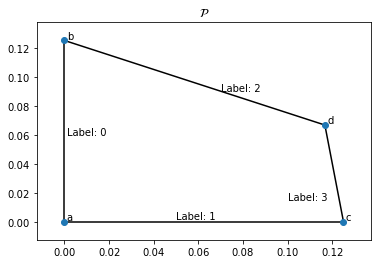

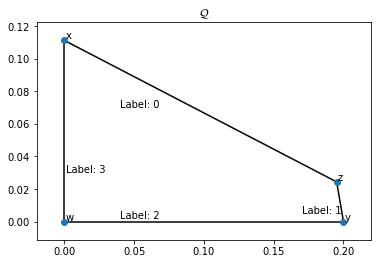

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial


V = [np.array([0, 0]), np.array([0, 1 / 8]), np.array([1 / 8,  0]), np.array([7 / 60, 1 / 15])]
P = scipy.spatial.ConvexHull(V)
plt.figure()
scipy.spatial.convex_hull_plot_2d(P);
plt.title("$\mathcal{P}$")
plt.text(0.001, .06, "Label: 0")
plt.text(0.05, .002, "Label: 1")
plt.text(0.07, .09, "Label: 2")
plt.text(0.1, .015, "Label: 3")
for v, s in zip(V, "abcd"):
    plt.text(v[0] + 0.001, v[1] + 0.001, s)
;

V = [np.array([0, 0]), np.array([0, 1 / 9]), np.array([1 / 5,  0]), np.array([8 / 41, 1 / 41])]
Q = scipy.spatial.ConvexHull(V)
plt.figure()
scipy.spatial.convex_hull_plot_2d(Q);
plt.title("$\mathcal{Q}$")
plt.text(0.001, .03, "Label: 3")
plt.text(0.04, .002, "Label: 2")
plt.text(0.04, .07, "Label: 0")
plt.text(0.17, .005, "Label: 1")
for v, s in zip(V, "wxyz"):
    plt.text(v[0] + 0.001, v[1] + 0.001, s)
;

Using the plot we can carry out the Lemke-Howson algorithm:

- Dropping label 0:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 0.
  - $\to (c, w)$ have labels $\{1, 3\}, \{2, 3\}$. In $\mathcal{Q}$ drop 3.
  - $\to (c, y)$ have labels $\{1, 3\}, \{1, 2\}$. In $\mathcal{P}$ drop 1.
  - $\to (d, y)$ have labels $\{2, 3\}, \{1, 2\}$. In $\mathcal{Q}$ drop 2.
  - $\to (d, z)$ have labels $\{2, 3\}, \{0, 1\}$. Fully labeled vertex pair.

- Dropping label 1:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 1.
  - $\to (b, w)$ have labels $\{0, 2\}, \{2, 3\}$. In $\mathcal{Q}$ drop 2.
  - $\to (b, x)$ have labels $\{0, 2\}, \{0, 3\}$. In $\mathcal{P}$ drop 0.
  - $\to (d, x)$ have labels $\{2, 3\}, \{0, 3\}$. In $\mathcal{Q}$ drop 3.
  - $\to (d, z)$ have labels $\{2, 3\}, \{0, 1\}$. Fully labeled vertex pair.
  
- Dropping label 2:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 2.
  - $\to (a, x)$ have labels $\{0, 1\}, \{0, 3\}$. In $\mathcal{P}$ drop 0.
  - $\to (c, x)$ have labels $\{1, 3\}, \{0, 3\}$. In $\mathcal{Q}$ drop 3.
  - $\to (c, z)$ have labels $\{1, 3\}, \{0, 1\}$. In $\mathcal{P}$ drop 1.
  - $\to (d, z)$ have labels $\{2, 3\}, \{0, 1\}$. Fully labeled vertex pair.
  
- Dropping label 3:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 3.
  - $\to (a, y)$ have labels $\{0, 1\}, \{1, 2\}$. In $\mathcal{P}$ drop 1.
  - $\to (b, y)$ have labels $\{0, 2\}, \{1, 2\}$. In $\mathcal{Q}$ drop 2.
  - $\to (b, z)$ have labels $\{0, 2\}, \{0, 1\}$. In $\mathcal{P}$ drop 0.
  - $\to (d, z)$ have labels $\{2, 3\}, \{0, 1\}$. Fully labeled vertex pair.
  
For all of these dropped labels the only fully labeled vertex pair is:    


$$((7/60, 1/15), (8/41, 1/41))$$

which gives the normalised Nash equilibrium:

$$((7/11, 4/11), (8/9, 1/9))$$

In [22]:
import numpy as np
import nash
A = np.array([[3, -1], [2, 7]])
B = np.array([[-3, 1], [1, -6]])
game = nash.Game(A, B)
list(game.lemke_howson_enumeration())

[(array([ 0.63636364,  0.36363636]), array([ 0.88888889,  0.11111111])),
 (array([ 0.63636364,  0.36363636]), array([ 0.88888889,  0.11111111])),
 (array([ 0.63636364,  0.36363636]), array([ 0.88888889,  0.11111111])),
 (array([ 0.63636364,  0.36363636]), array([ 0.88888889,  0.11111111]))]

In [23]:
(7 / 11, 4 / 11), (8 / 9, 1 / 9)

((0.6363636363636364, 0.36363636363636365),
 (0.8888888888888888, 0.1111111111111111))

   `2`. $
   A =
   \begin{pmatrix}
   2 & -1\\
   1 & 3\end{pmatrix}
   \qquad
   B =
   \begin{pmatrix}
   -2 & 2\\
   1 & -2\end{pmatrix}
   $  
   
   From the previous exercise sheet https://vknight.org/gt/exercises/06/ we have the vertices of the row player best response polytope $\mathcal{P}$ (with labels):
   
   - $a=(0, 0)$: $\{0, 1\}$
   - $b=(0, 1/4)$: $\{0, 2\}$
   - $c=(1/5, 0)$: $\{1, 3\}$
   - $d=(3/19, 4/19)$: $\{2, 3\}$
   
   The vertices for the column player best response polytope $\mathcal{Q}$ (with labels):
   
   - $w=(0, 0)$: $\{2, 3\}$
   - $x=(0, 1/5)$: $\{1, 2\}$
   - $y=(1/4, 0)$: $\{0, 3\}$
   - $z=(4/17, 1/17)$: $\{0, 1\}$
   
   Here is the plot of these:

''

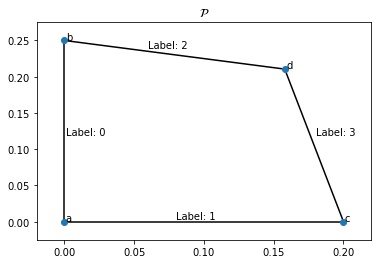

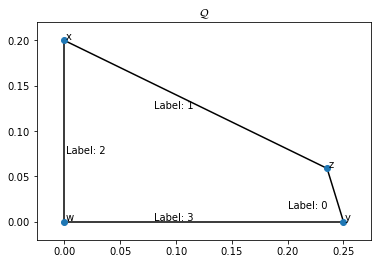

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial

V = [np.array([0, 0]), np.array([0, 1 / 4]), np.array([1 / 5,  0]), np.array([3/19, 4/19])]
P = scipy.spatial.ConvexHull(V)
plt.figure()
scipy.spatial.convex_hull_plot_2d(P);
plt.title("$\mathcal{P}$")
plt.text(0.001, .12, "Label: 0")
plt.text(0.08, .004, "Label: 1")
plt.text(0.06, .24, "Label: 2")
plt.text(0.18, .12, "Label: 3")
for v, s in zip(V, "abcd"):
    plt.text(v[0] + 0.001, v[1] + 0.001, s)
;

V = [np.array([0, 0]), np.array([0, 1 / 5]), np.array([1 / 4,  0]), np.array([4 / 17, 1 / 17])]
Q = scipy.spatial.ConvexHull(V)
plt.figure()
scipy.spatial.convex_hull_plot_2d(Q);
plt.title("$\mathcal{Q}$")
plt.text(0.001, .075, "Label: 2")
plt.text(0.08, .002, "Label: 3")
plt.text(0.08, .125, "Label: 1")
plt.text(0.20, .015, "Label: 0")
for v, s in zip(V, "wxyz"):
    plt.text(v[0] + 0.001, v[1] + 0.001, s)
;

Using the plot we can carry out the Lemke-Howson algorithm:

- Dropping label 0:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 0.
  - $\to (c, w)$ have labels $\{1, 3\}, \{2, 3\}$. In $\mathcal{Q}$ drop 3.
  - $\to (c, y)$ have labels $\{1, 3\}, \{1, 2\}$. In $\mathcal{P}$ drop 1.
  - $\to (d, y)$ have labels $\{2, 3\}, \{1, 2\}$. In $\mathcal{Q}$ drop 2.
  - $\to (d, z)$ have labels $\{2, 3\}, \{0, 1\}$. Fully labeled vertex pair.

- Dropping label 1:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 1.
  - $\to (b, w)$ have labels $\{0, 2\}, \{2, 3\}$. In $\mathcal{Q}$ drop 2.
  - $\to (b, y)$ have labels $\{0, 2\}, \{0, 3\}$. In $\mathcal{P}$ drop 0.
  - $\to (d, x)$ have labels $\{2, 3\}, \{0, 3\}$. In $\mathcal{Q}$ drop 3.
  - $\to (d, z)$ have labels $\{2, 3\}, \{0, 1\}$. Fully labeled vertex pair.
  
- Dropping label 2:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 2.
  - $\to (a, y)$ have labels $\{0, 1\}, \{0, 3\}$. In $\mathcal{P}$ drop 0.
  - $\to (c, y)$ have labels $\{1, 3\}, \{0, 3\}$. In $\mathcal{Q}$ drop 3.
  - $\to (c, z)$ have labels $\{1, 3\}, \{0, 1\}$. In $\mathcal{P}$ drop 1.
  - $\to (d, z)$ have labels $\{2, 3\}, \{0, 1\}$. Fully labeled vertex pair.
  
- Dropping label 3:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 3.
  - $\to (a, x)$ have labels $\{0, 1\}, \{1, 2\}$. In $\mathcal{P}$ drop 1.
  - $\to (b, x)$ have labels $\{0, 2\}, \{1, 2\}$. In $\mathcal{Q}$ drop 2.
  - $\to (b, z)$ have labels $\{0, 2\}, \{0, 1\}$. In $\mathcal{P}$ drop 0.
  - $\to (d, z)$ have labels $\{2, 3\}, \{0, 1\}$. Fully labeled vertex pair.
  
For all of these dropped labels the only fully labeled vertex pair is:    

$$(d, z) = ((3/19, 4/19), (4/17, 1/17))$$

which gives the normalised Nash equilibrium:

$$((3/7,4/7),(4/5,1/5))$$

In [27]:
A = np.array([[2, -1], [1, 3]])
B = np.array([[-2, 2], [1, -2]])
game = nash.Game(A, B)
list(game.lemke_howson_enumeration())

[(array([ 0.42857143,  0.57142857]), array([ 0.8,  0.2])),
 (array([ 0.42857143,  0.57142857]), array([ 0.8,  0.2])),
 (array([ 0.42857143,  0.57142857]), array([ 0.8,  0.2])),
 (array([ 0.42857143,  0.57142857]), array([ 0.8,  0.2]))]

In [28]:
(3 / 7, 4 / 7), (4 / 5, 1 / 5)

((0.42857142857142855, 0.5714285714285714), (0.8, 0.2))

   
`3`. Use the tableaux representation to execute the Lemke-Howson algorithm (with all possible starting labels) on the games of question 2.

   We start by ensuring our payoff matrices are positive:

   1. $
   A \to A + 2 =
   \begin{pmatrix}
   5 & 1\\
   4 & 9\end{pmatrix}
   \qquad
   B \to B + 7 =
   \begin{pmatrix}
   4 & 8\\
   8 & 1\end{pmatrix}
   $ 
   
The tableaux are:

$$
T_r = 
\begin{pmatrix}
B^T&I &1\\
\end{pmatrix} =
\begin{pmatrix}
4 & 8 & 1 & 0 & 1\\
8 & 1 & 0 & 1 & 1
\end{pmatrix}
$$

$$
T_c = 
\begin{pmatrix}
I&A &1\\
\end{pmatrix} =
\begin{pmatrix}
1 & 0 & 5 & 1 & 1\\
0 & 1 & 4 & 9 & 1
\end{pmatrix}
$$
   
Dropping label 0: corresonds to first column of $T_r$ (non basic variables correspond to labels). Looking at the ratios in the first column (to the values in the last column): $1/4$ and $1/8$. So we pivot on the second row, giving:
   
$$
T_r = 
\begin{pmatrix}
0 & 60 & 8 & -4 & 4\\
8 & 1 & 0 & 1 & 1
\end{pmatrix}
$$

This now has labels (non basic variables) $\{1, 3\}$. So we need to pivot column 3 in $T_c$. Looking at the fourth column ratios: $1/1$ and $1/9$, thus we pivot on the second row:

$$
T_c = 
\begin{pmatrix}
9 & -1 & 41 & 0 & 8\\
0 & 1 & 4 & 9 & 1
\end{pmatrix}
$$


This now has labels (non basic variables) $\{1, 2\}$. So we need to pivot column 1 in $T_r$. Looking at the second column ratios: $4/60$ and $1/1$, thus we pivot on the first row:

$$
T_r = 
\begin{pmatrix}
0 & 60 & 8 & -4 & 4\\
480 & 0 & -8 & 64 & 56
\end{pmatrix}
$$

This now has labels (non basic variables) $\{2, 3\}$ we wee need to pivot column 2 in $T_c$. Looking at the third column ratios: $8/41$ and $1/4$, thus we pivot on the first row:     

$$
T_c = 
\begin{pmatrix}
9 & -1 & 41 & 0 & 8\\
-36 & 45 & 0 & 369 & 9
\end{pmatrix}
$$

This now has labels $\{0, 1\}$ so we have a fully labeled vertex pair. Setting the non basic variables to 0 in each tableaux gives:

$$((56/480, 4/60), (8/41, 9/369)) = ((7/60, 1/15), (8/41, 1/41))$$

which gives the normalised Nash equilibrium:

$$((7/11, 4/11), (8/9, 1/9))$$

Here is some code to carry out the above: 

In [29]:
import numpy as np
row_tableau = np.array([[4, 8, 1, 0, 1],
                        [8, 1, 0, 1, 1]])
col_tableau = np.array([[1, 0, 5, 1, 1],
                        [0, 1, 4, 9, 1]])

In [30]:
import nash
# Dropping label 0 from row tableau
dropped_label = nash.integer_pivoting.pivot_tableau(row_tableau,
                                                    column_index=0)
row_tableau

array([[ 0, 60,  8, -4,  4],
       [ 8,  1,  0,  1,  1]])

In [31]:
# Dropping label 3 from col tableau
dropped_label = nash.integer_pivoting.pivot_tableau(col_tableau,
                                                    column_index=3)
col_tableau

array([[ 9, -1, 41,  0,  8],
       [ 0,  1,  4,  9,  1]])

In [32]:
# Dropping label 1 from row tableau
dropped_label = nash.integer_pivoting.pivot_tableau(row_tableau,
                                                    column_index=1)
row_tableau

array([[  0,  60,   8,  -4,   4],
       [480,   0,  -8,  64,  56]])

In [33]:
# Dropping label 2 from col tableau
dropped_label = nash.integer_pivoting.pivot_tableau(col_tableau,
                                                    column_index=2)
col_tableau

array([[  9,  -1,  41,   0,   8],
       [-36,  45,   0, 369,   9]])

`2`. $
   A \to A + 2 =
   \begin{pmatrix}
   4 & 1\\
   3 & 5\end{pmatrix}
   \qquad
   B \to B + 3 =
   \begin{pmatrix}
   1 & 5\\
   4 & 1\end{pmatrix}
   $
   
The tableaux are:

$$
T_r = 
\begin{pmatrix}
B^T&I &1\\
\end{pmatrix} =
\begin{pmatrix}
1 & 4 & 1 & 0 & 1\\
5 & 1 & 0 & 1 & 1
\end{pmatrix}
$$

$$
T_c = 
\begin{pmatrix}
I&A &1\\
\end{pmatrix} =
\begin{pmatrix}
1 & 0 & 4 & 1 & 1\\
0 & 1 & 3 & 5 & 1
\end{pmatrix}
$$
   
Dropping label 0: corresonds to first column of $T_r$ (non basic variables correspond to labels). Looking at the ratios in the first column (to the values in the last column): $1/4$ and $1/5$. So we pivot on the second row, giving:
   
$$
T_r = 
\begin{pmatrix}
0 & 19 & 5 & -1 & 4\\
5 & 1 & 0 & 1 & 1
\end{pmatrix}
$$

This now has labels (non basic variables) $\{1, 3\}$. So we need to pivot column 3 in $T_c$. Looking at the fourth column ratios: $1/1$ and $1/5$, thus we pivot on the second row:

$$
T_c = 
\begin{pmatrix}
5 & -1 & 17 & 0 & 4\\
0 & 1 & 3 & 5 & 1
\end{pmatrix}
$$


This now has labels (non basic variables) $\{1, 2\}$. So we need to pivot column 1 in $T_r$. Looking at the second column ratios: $1/19$ and $1/1$, thus we pivot on the first row:

$$
T_r = 
\begin{pmatrix}
0 & 19 & 5 & -1 & 4\\
95 & 0 & -5 & 20 & 15
\end{pmatrix}
$$


This now has labels (non basic variables) $\{2, 3\}$ we wee need to pivot column 2 in $T_c$. Looking at the third column ratios: $4/17$ and $1/3$, thus we pivot on the first row:     

$$
T_c = 
\begin{pmatrix}
5 & -1 & 17 & 0 & 4\\
-15 & 20 & 0 & 85 & 5
\end{pmatrix}
$$

This now has labels $\{0, 1\}$ so we have a fully labeled vertex pair. Setting the non basic variables to 0 in each tableaux gives:

$$((15/95, 4/19), (4/17, 5/85)) = ((3/19, 4/19), (4/17, 1/17))$$

which gives the normalised Nash equilibrium:

$$((3/7, 4/7), (4/5, 1/5))$$

Here is some code to carry out the above: 

In [48]:
row_tableau = np.array([[1, 4, 1, 0, 1],
                        [5, 1, 0, 1, 1]])
col_tableau = np.array([[1, 0, 4, 1, 1],
                        [0, 1, 3, 5, 1]])

In [49]:
# Dropping label 0 from row tableau
dropped_label = nash.integer_pivoting.pivot_tableau(row_tableau,
                                                    column_index=0)
row_tableau

array([[ 0, 19,  5, -1,  4],
       [ 5,  1,  0,  1,  1]])

In [50]:
# Dropping label 3 from col tableau
dropped_label = nash.integer_pivoting.pivot_tableau(col_tableau,
                                                    column_index=3)
col_tableau

array([[ 5, -1, 17,  0,  4],
       [ 0,  1,  3,  5,  1]])

In [51]:
# Dropping label 1 from row tableau
dropped_label = nash.integer_pivoting.pivot_tableau(row_tableau,
                                                    column_index=1)
row_tableau

array([[ 0, 19,  5, -1,  4],
       [95,  0, -5, 20, 15]])

In [52]:
# Dropping label 2 from col tableau
dropped_label = nash.integer_pivoting.pivot_tableau(col_tableau,
                                                    column_index=2)
col_tableau

array([[  5,  -1,  17,   0,   4],
       [-15,  20,   0,  85,   5]])